In [1]:
#the efficient market hyptohesis says that securities should reflect their avaialable information
#that means that investors should expect to obtain an equilibrium of their returns
#there are three different kinds of equilibrium: weak, semi-strong, and strong
#there are different kinds of seasonality effects: the weekend effect, monthly effect, holiday effect

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import fix_yahoo_finance as yf

start = '2002-01-01'
end = '2018-01-01'
symbol = 'SPY'
data = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,267.600006,267.640015,266.899994,267.510010,256.138550,78720900
2017-12-26,267.049988,267.440002,266.890015,267.190002,255.832169,45244400
2017-12-27,267.380005,267.730011,267.010010,267.320007,255.956604,57751000
2017-12-28,267.890015,267.920013,267.450012,267.869995,256.483246,45116100
2017-12-29,268.529999,268.549988,266.640015,266.859985,255.516174,96007400


In [8]:
spy = data['Adj Close']

In [10]:
spy.tail()

Date
2017-12-22    256.138550
2017-12-26    255.832169
2017-12-27    255.956604
2017-12-28    256.483246
2017-12-29    255.516174
Name: Adj Close, dtype: float64

In [14]:
r = spy.pct_change()
r.tail()

Date
2017-12-22   -0.000261
2017-12-26   -0.001196
2017-12-27    0.000486
2017-12-28    0.002058
2017-12-29   -0.003771
Name: Adj Close, dtype: float64

In [15]:
monthly_returns = r.groupby([r.index.year.rename('year'), r.index.month.rename('month')]).mean()

In [16]:
monthly_returns

year  month
2002  1       -0.000965
      2       -0.000873
      3        0.001682
      4       -0.002667
      5       -0.000178
                 ...   
2017  8        0.000143
      9        0.001003
      10       0.001064
      11       0.001443
      12       0.000609
Name: Adj Close, Length: 192, dtype: float64

In [17]:
from pylab import rcParams

In [20]:
rcParams['figure.figsize'] = 20, 10

monthly_returns_list = []

for i in range(len(monthly_returns)):
    
    monthly_returns_list.append({'year': monthly_returns.index[i][0], 'month': monthly_returns.index[i][1],
                                'monthly_return': monthly_returns[i]})

In [22]:
monthly_returns_list

[{'year': 2002, 'month': 1, 'monthly_return': -0.0009654337364359833},
 {'year': 2002, 'month': 2, 'monthly_return': -0.0008725160249236699},
 {'year': 2002, 'month': 3, 'monthly_return': 0.001681749938232452},
 {'year': 2002, 'month': 4, 'monthly_return': -0.0026667477363230122},
 {'year': 2002, 'month': 5, 'monthly_return': -0.0001784320812317295},
 {'year': 2002, 'month': 6, 'monthly_return': -0.003726356447928403},
 {'year': 2002, 'month': 7, 'monthly_return': -0.003379465964488379},
 {'year': 2002, 'month': 8, 'monthly_return': 0.0005100990494294164},
 {'year': 2002, 'month': 9, 'monthly_return': -0.005377810606224725},
 {'year': 2002, 'month': 10, 'monthly_return': 0.0037180654371912784},
 {'year': 2002, 'month': 11, 'monthly_return': 0.0031006206145161195},
 {'year': 2002, 'month': 12, 'monthly_return': -0.002693708541990982},
 {'year': 2003, 'month': 1, 'monthly_return': -0.001078376583737048},
 {'year': 2003, 'month': 2, 'monthly_return': -0.0006499813196129601},
 {'year': 200

In [23]:
monthly_returns_list = pd.DataFrame(monthly_returns_list, columns = ('year', 'month', 'monthly_return'))

In [24]:
monthly_returns_list

,year,month,monthly_return
0,2002,1,-0.000965
1,2002,2,-0.000873
2,2002,3,0.001682
3,2002,4,-0.002667
4,2002,5,-0.000178
...,...,...,...
187,2017,8,0.000143
188,2017,9,0.001003
189,2017,10,0.001064
190,2017,11,0.001443


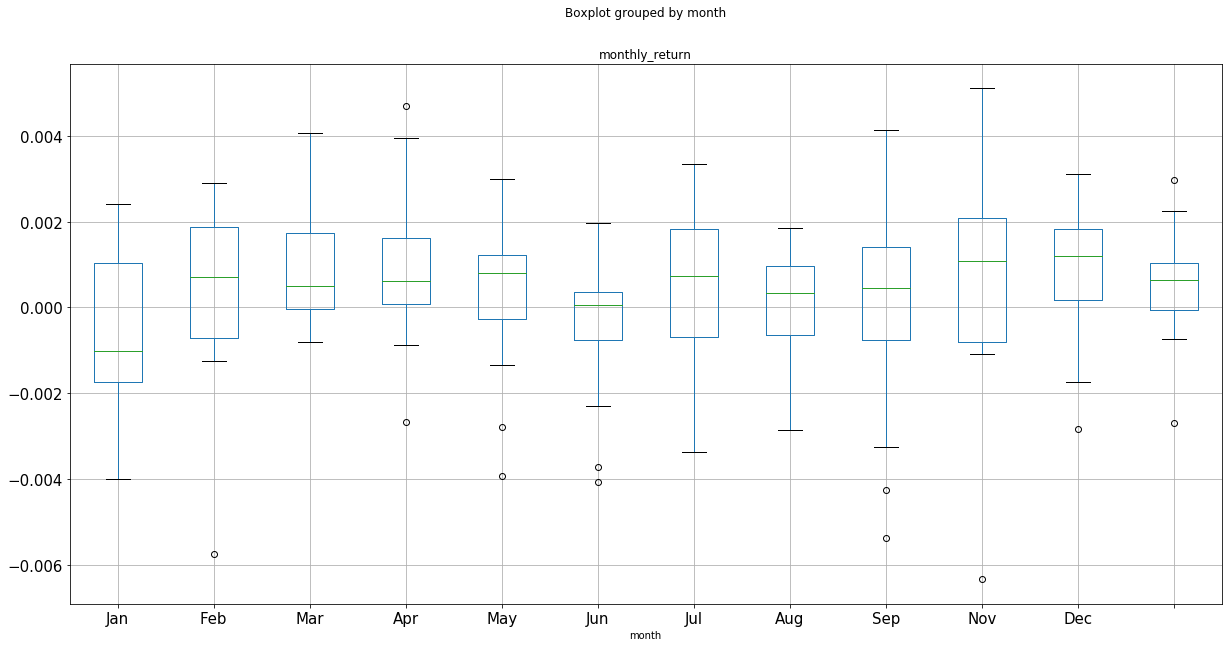

In [28]:
monthly_returns_list.boxplot(column = 'monthly_return', by = 'month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec']
ax.set_xticklabels(labels)

plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

In [29]:
#they are going to run an Augmented Dickey Fuller Test. 
#the null hypothesis states that large p values indicate non-stationarity
#and smaller p values indicate stationarity 

In [38]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(spy)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Value:')
for key, value in result[4].items():
    print ('\t%s: %.3f' % (key, value))

ADF Statistic: 2.010603
p-value: 0.998687
Critical Value:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [40]:
#because the time series shows that they are non stationary which means that it is stochastic

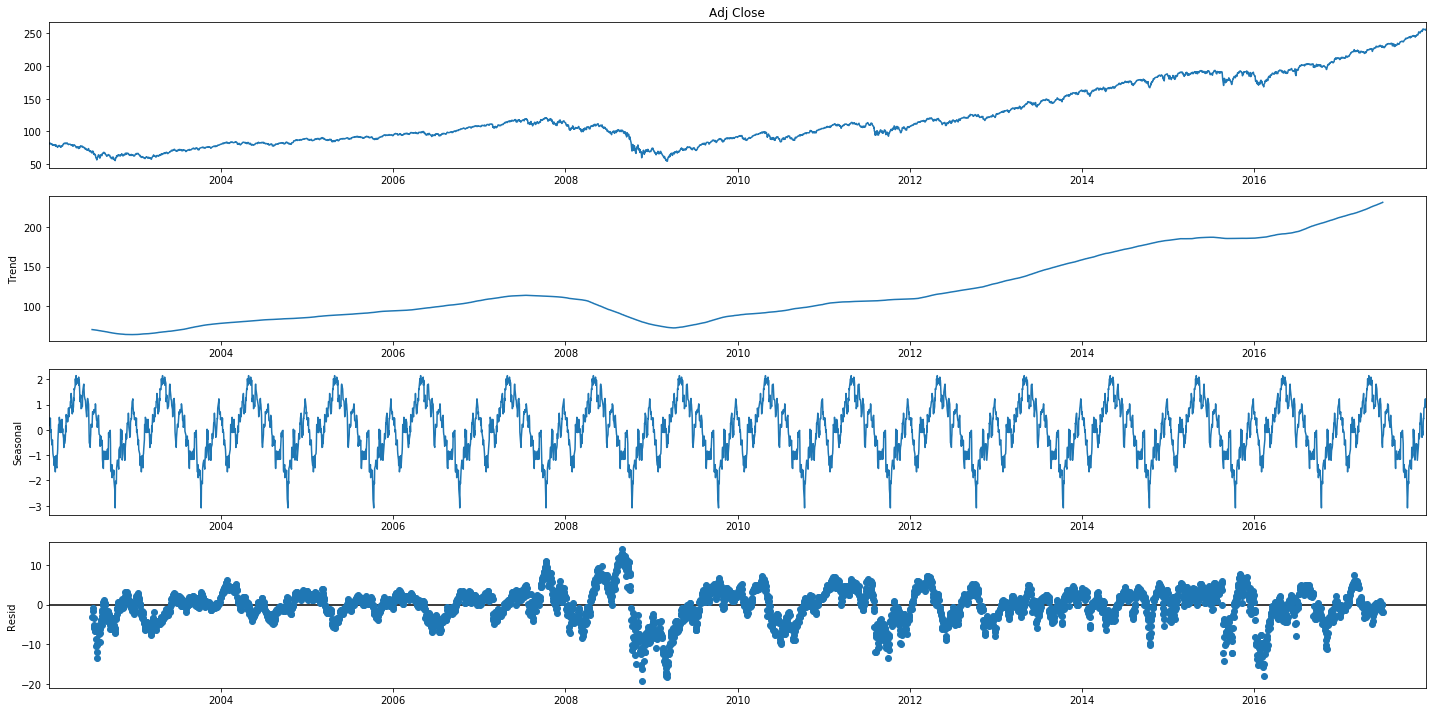

In [42]:
import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(spy, model = "additive", period = 252)
resplot = res.plot()